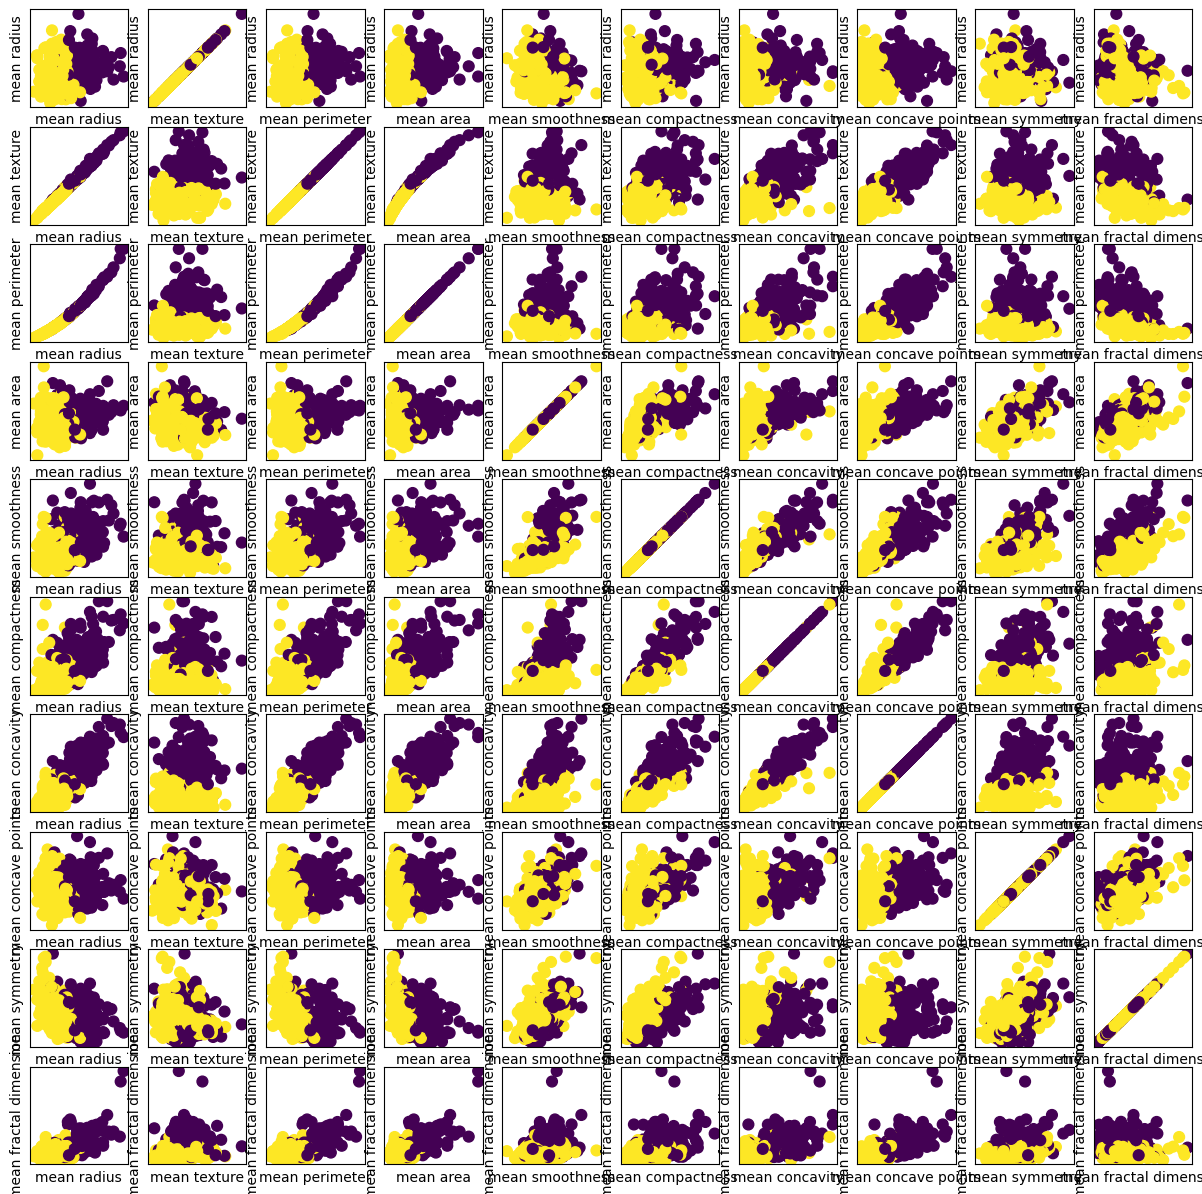

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

dados = datasets.load_breast_cancer()

fig, ax = plt.subplots(10, 10, figsize=(15, 15))

for i in range(10):
    for j in range(10):
        ax[i, j].scatter(dados.data[:, j], dados.data[:, i+1], c=dados.target, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        ax[i, j].set_ylabel(dados.feature_names[i])
        ax[i, j].set_xlabel(dados.feature_names[j])

In [20]:
# nomes dos rótulos
print(dados.target_names)

['malignant' 'benign']


In [21]:
# rótulos
print(dados.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [22]:
print(dados.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [23]:
# print(dados.data)

In [24]:
import pandas as pd
total = pd.DataFrame(data=dados.data, columns=dados.feature_names)
# total.head()

<Axes: xlabel='mean area', ylabel='mean perimeter'>

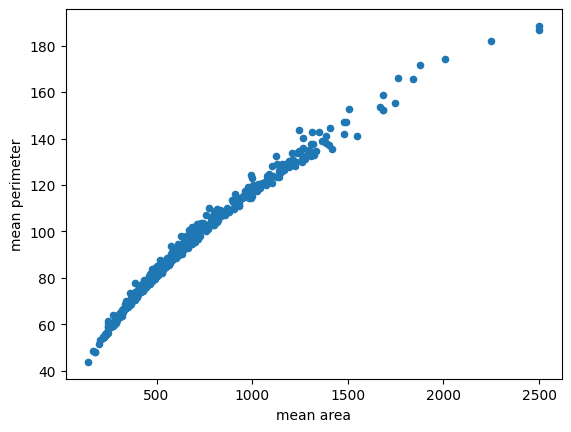

In [25]:
%matplotlib inline
total.plot.scatter('mean area', 'mean perimeter')

In [26]:
from sklearn.model_selection import train_test_split
X = dados.data[:, [2, 3]]
y = dados.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Total de registros com características para treino: ", X_train.shape)
print("Total de registros com rótulos para treino........: ", y_train.shape)
print("Total de registros com características para teste.: ", X_test.shape)
print("Total de registros com rótulos para teste.........: ", y_test.shape)

Total de registros com características para treino:  (398, 2)
Total de registros com rótulos para treino........:  (398,)
Total de registros com características para teste.:  (171, 2)
Total de registros com rótulos para teste.........:  (171,)


In [27]:
from sklearn import svm
modelo = svm.SVC(kernel = 'linear', C = 1)
modelo.fit(X_train, y_train)
previsao = modelo.predict(X_test)
# print(previsao)

In [28]:
previstos = pd.DataFrame(data=X_test, columns=dados.feature_names[0:2])
# previstos.head()

In [29]:
previstos['target'] = previsao
# previstos.head()

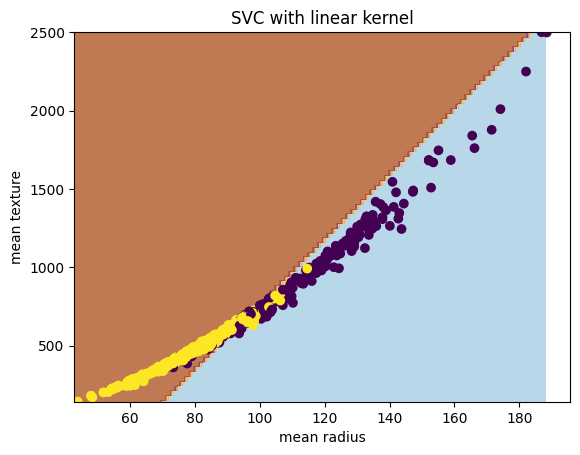

In [30]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(1, 1, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('SVC with linear kernel')
plt.show()

In [31]:
from sklearn.metrics import classification_report, accuracy_score

print("Relatório de classificação: ")
print(classification_report(y_test, previsao))
print("Relatório de score: ", modelo.score(X, y))
print("Acurácia do modelo: ", accuracy_score(y_test, previsao))

Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        66
           1       0.88      0.93      0.91       105

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171

Relatório de score:  0.8910369068541301
Acurácia do modelo:  0.8830409356725146


In [32]:
print(dados.keys())

df_feat = pd.DataFrame(dados['data'], columns=dados['feature_names'])

print(df_feat.head())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430    

In [33]:
df_target = pd.DataFrame(dados['target'], columns=['cancer'])

print(df_target.head())

   cancer
0       0
1       0
2       0
3       0
4       0


In [34]:
print('Variáveis Festures: ')
print(df_feat.info())

Variáveis Festures: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

model = svm.SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [36]:
from sklearn.model_selection import GridSearchCV

# definindo as faixas de parâmetros
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} # Tentei usar o poly, mas demorou muito para executar

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)

# Executando o treinamento com todo o Grid de parâmetros
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.937 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.950 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.925 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.937 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.962 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [37]:
# Exibindo os melhores resultados
print(grid.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [38]:
# Exibindo como o modelo ficou após
# a otimização dos parâmetros
print(grid.best_estimator_)

SVC(C=100, gamma=1, kernel='linear')


In [39]:
# Exibindo a predição novamente
grid_predictions = grid.predict(X_test)

# Exibindo novamente os resultados
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

